# OASIS INFOBYTE(DATA SCIENCE)

# Sales Prediction Using Python

NAME - Saurabh Bhosale

# Import all the required libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import seaborn as sns

# Import Data set

In [2]:
df=pd.read_csv("C:\\Users\\Dell\Downloads\\oasis task 5\\Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


# Exploring data

In [3]:
df.shape

(200, 5)

In [4]:
df.isnull().sum()


Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [5]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# Obtaining Description/Summary Dataframe

In [6]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


# Data Visualization

<AxesSubplot:>

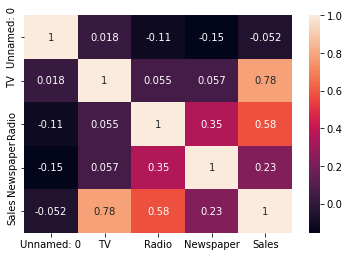

In [7]:
sns.heatmap(df.corr(),annot=True)

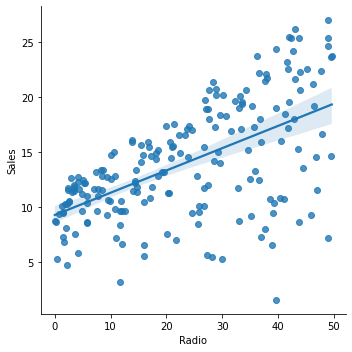

In [8]:
sns.lmplot(data=df,x='Radio',y="Sales")

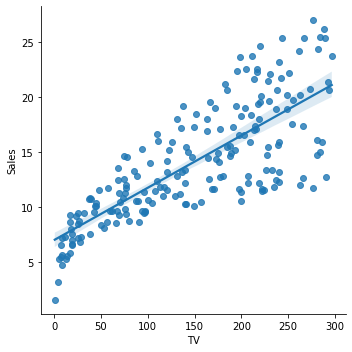

In [9]:
sns.lmplot(data=df,x='TV',y="Sales")

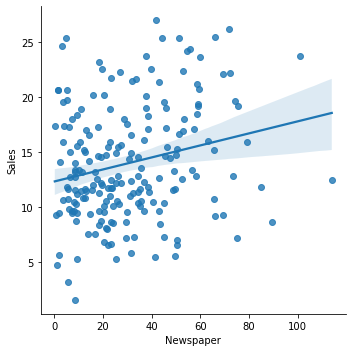

In [10]:
sns.lmplot(data=df,x='Newspaper',y="Sales")

# Building the model

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [12]:
x=df[['TV','Radio','Newspaper']]
y=df['Sales']

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.65, random_state=0)

In [13]:
model=LinearRegression()

model.fit(x_train,y_train)

y_predict=model.predict(x_test)

In [14]:
type(x_train)

pandas.core.frame.DataFrame

In [15]:
type(y_train)

pandas.core.series.Series

In [16]:
x_train

,TV,Radio,Newspaper
139,184.9,43.9,1.7
90,134.3,4.9,9.3
137,273.7,28.9,59.7
101,296.4,36.3,100.9
144,96.2,14.8,38.9
...,...,...,...
67,139.3,14.5,10.2
192,17.2,4.1,31.6
117,76.4,0.8,14.8
47,239.9,41.5,18.5


In [17]:
y_train

139    20.7
90     11.2
137    20.8
101    23.8
144    11.4
       ... 
67     13.4
192     5.9
117     9.4
47     23.2
172     7.6
Name: Sales, Length: 130, dtype: float64

In [18]:
print(model.intercept_)
print(model.coef_)

2.8488459814759004
[0.04441066 0.19656498 0.00357552]


In [19]:
act_predict=pd.DataFrame({
    'Actual':y_test.values.flatten(),
    'Predict':y_predict.flatten()
})
act_predict.head(20)

,Actual,Predict
0,11.3,10.017078
1,8.4,7.415322
2,8.7,7.005491
3,25.4,24.212379
4,11.7,12.066605
5,8.7,6.571338
6,7.2,13.115410
7,13.2,14.977876
8,9.2,11.040877
9,16.6,16.255128


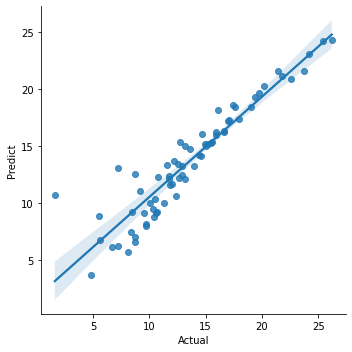

In [20]:
sns.lmplot(data=act_predict,x='Actual',y="Predict")

# Evaluation of the model

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [22]:
print("Mean_absolute_error:",mean_absolute_error(y_test,y_predict))
print("Mean_squared_error:",mean_squared_error(y_test,y_predict))
print("Squre_Mean_absolute_error:",np.sqrt(mean_absolute_error(y_test,y_predict)))
print("r2_score:",r2_score(y_test,y_predict))

Mean_absolute_error: 1.1772969293020838
Mean_squared_error: 3.2848476202765773
Squre_Mean_absolute_error: 1.0850331466375043
r2_score: 0.8715709300673591


# Thank You!!!